In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Memuat file CSV
# Pastikan nama file sesuai: processed_kelulusan.csv
df = pd.read_csv('processed_kelulusan.csv')

# Menampilkan 5 baris pertama data untuk verifikasi
print("Data Awal (5 Baris Pertama):")
print(df.head())
print("-" * 50)

# 'Lulus' adalah variabel target (y)
y = df['Lulus']

# Kolom fitur (X) adalah semua kolom kecuali 'Lulus'
# Kolom Rasio_Absensi dan IPK_x_Study sudah ada di file CSV Anda
X = df.drop('Lulus', axis=1)

print("Kolom Fitur (X):", X.columns.tolist())
print("Kolom Target (y): Lulus")
print("-" * 50)

# Membagi data menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah sampel data latih (X_train): {X_train.shape[0]}")
print(f"Jumlah sampel data uji (X_test): {X_test.shape[0]}")
print("-" * 50)

# Menggunakan StandardScaler untuk standardisasi fitur
scaler = StandardScaler()

# Melatih scaler HANYA pada data latih (X_train)
X_train_scaled = scaler.fit_transform(X_train)

# Menerapkan scaler pada data uji (X_test)
X_test_scaled = scaler.transform(X_test)

print("Standardisasi fitur selesai.")
print("-" * 50)

# Membuat dan Melatih Model Regresi Logistik
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

print("Model Regresi Logistik berhasil dilatih.")
print("-" * 50)

# Memprediksi data uji
y_pred = model.predict(X_test_scaled)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Akurasi Model: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

Data Awal (5 Baris Pertama):
   IPK  Jumlah_Absensi  Waktu_Belajar_Jam  Lulus  Rasio_Absensi  IPK_x_Study
0  3.8               3                 10      1       0.214286         38.0
1  2.5               8                  5      0       0.571429         12.5
2  3.4               4                  7      1       0.285714         23.8
3  2.1              12                  2      0       0.857143          4.2
4  3.9               2                 12      1       0.142857         46.8
--------------------------------------------------
Kolom Fitur (X): ['IPK', 'Jumlah_Absensi', 'Waktu_Belajar_Jam', 'Rasio_Absensi', 'IPK_x_Study']
Kolom Target (y): Lulus
--------------------------------------------------
Jumlah sampel data latih (X_train): 8
Jumlah sampel data uji (X_test): 2
--------------------------------------------------
Standardisasi fitur selesai.
--------------------------------------------------
Model Regresi Logistik berhasil dilatih.
------------------------------------------

In [10]:
# Pastikan Anda telah menjalankan semua langkah sebelumnya
# (Memuat data, Pembagian data, Standardisasi, dan Pelatihan Model)

# 1. Mengambil nama-nama fitur
# Kita gunakan nama kolom dari data fitur asli (sebelum scaling)
feature_names = X.columns

# 2. Mengambil koefisien dari model Regresi Logistik
# Koefisien disimpan di atribut 'coef_'
coefficients = model.coef_[0]

# 3. Membuat DataFrame untuk menampilkan nama fitur dan koefisien
# Ini memudahkan pembacaan hasil
coef_df = pd.DataFrame({
    'Fitur': feature_names,
    'Koefisien': coefficients
})

# 4. Mengurutkan DataFrame berdasarkan nilai absolut Koefisien (opsional, tapi disarankan)
# Koefisien dengan nilai absolut terbesar adalah yang paling penting
coef_df['Abs_Koefisien'] = abs(coef_df['Koefisien'])
coef_df = coef_df.sort_values(by='Abs_Koefisien', ascending=False).drop('Abs_Koefisien', axis=1)

# 5. Menampilkan hasilnya
print("Koefisien Model Regresi Logistik (Diurutkan berdasarkan nilai):")
print(coef_df)

Koefisien Model Regresi Logistik (Diurutkan berdasarkan nilai):
               Fitur  Koefisien
0                IPK   0.608299
2  Waktu_Belajar_Jam   0.601596
4        IPK_x_Study   0.575694
1     Jumlah_Absensi  -0.483263
3      Rasio_Absensi  -0.483263


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 1. Definisikan langkah pre-processing (StandardScaler)
# Di dalam pipeline, kita langsung menggunakan StandardScaler, ini menggantikan 'pre'
pre = StandardScaler()

# 2. Definisikan model Random Forest
rf = RandomForestClassifier(
    n_estimators=300, max_features="sqrt", class_weight="balanced", random_state=42
)

# 3. Buat Pipeline: (Standardisasi -> Klasifikasi RF)
pipe_rf = Pipeline([("pre", pre), ("clf", rf)])

# 4. Melatih Pipeline
# Pipeline akan otomatis melakukan standardisasi pada X_train, kemudian melatih model RF
# Gunakan data X_train (data asli, sebelum scaling)
pipe_rf.fit(X_train, y_train)

# 5. Memprediksi pada data uji
# Pipeline akan otomatis melakukan standardisasi pada X_test, kemudian memprediksi
# Kita gunakan X_test sebagai ganti X_val
y_pred_rf = pipe_rf.predict(X_test)

# 6. Menghitung F1 Score (Macro Average)
f1_val_rf = f1_score(y_test, y_pred_rf, average="macro")

print("RandomForest F1 (Test):", f1_val_rf)

RandomForest F1 (Test): 1.0


In [12]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

# --- RE-DEFINISI PRASYARAT (DATA LOADING & SPLITTING) ---
# df, X, y, X_train, y_train, X_test, y_test sudah dimuat dan dibagi sebelumnya
# Kode ini akan memastikan semua objek (termasuk pipe_rf) tersedia.
df = pd.read_csv('processed_kelulusan.csv')
y = df['Lulus']
X = df.drop('Lulus', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- RE-DEFINISI PIPE_RF ---
pre = StandardScaler()
rf = RandomForestClassifier(
    n_estimators=300, max_features="sqrt", class_weight="balanced", random_state=42
)
pipe_rf = Pipeline([("pre", pre), ("clf", rf)])


# --- GRID SEARCH (n_splits=4) ---
# Disesuaikan dari 5 menjadi 4
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
param = {
  "clf__max_depth": [None, 12, 20, 30],
  "clf__min_samples_split": [2, 5, 10]
}

# Inisiasi Grid Search
gs = GridSearchCV(pipe_rf, param_grid=param, cv=skf,
                  scoring="f1_macro", n_jobs=-1, verbose=1)

# Melatih Grid Search
print("Memulai Grid Search...")
gs.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("\nBest params:", gs.best_params_)
print("Best CV F1:", gs.best_score_)

# Evaluasi model terbaik pada data uji
best_rf = gs.best_estimator_
y_test_best = best_rf.predict(X_test)
f1_test_best = f1_score(y_test, y_test_best, average="macro")

print("Best RF F1 (Test):", f1_test_best)

Memulai Grid Search...
Fitting 4 folds for each of 12 candidates, totalling 48 fits

Best params: {'clf__max_depth': None, 'clf__min_samples_split': 2}
Best CV F1: 1.0
Best RF F1 (Test): 1.0


--- Hasil Evaluasi Model Terbaik ---
F1(test): 1.0

Classification report (test):
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         1
           1      1.000     1.000     1.000         1

    accuracy                          1.000         2
   macro avg      1.000     1.000     1.000         2
weighted avg      1.000     1.000     1.000         2


Confusion matrix (test):
[[1 0]
 [0 1]]

ROC-AUC(test): 1.0
Plot ROC-AUC disimpan sebagai 'roc_test.png'


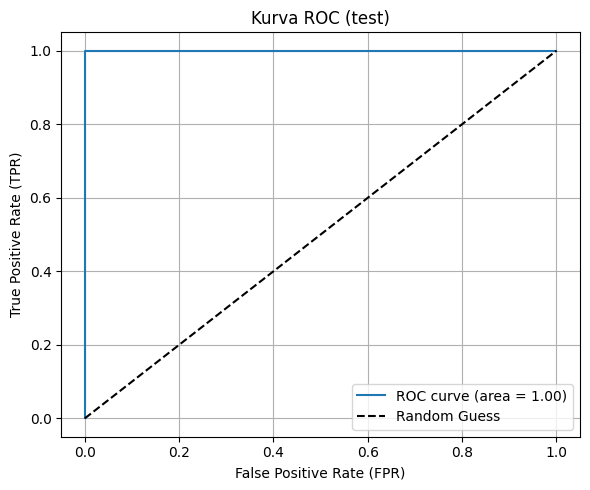

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# --- 1. RE-DEFINISI PRASYARAT (DATA & MODEL TERBAIK) ---
# Memuat data dan membagi data (diperlukan untuk X_test dan y_test)
df = pd.read_csv('processed_kelulusan.csv')
y = df['Lulus']
X = df.drop('Lulus', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Re-run Grid Search untuk mendapatkan 'best_rf' (model terbaik)
pre = StandardScaler()
rf = RandomForestClassifier(n_estimators=300, max_features="sqrt", class_weight="balanced", random_state=42)
pipe_rf = Pipeline([("pre", pre), ("clf", rf)])

# Parameter terbaik yang ditemukan di langkah sebelumnya:
param = {'clf__max_depth': None, 'clf__min_samples_split': 2} 
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

gs = GridSearchCV(pipe_rf, param_grid={'clf__max_depth': [None], 'clf__min_samples_split': [2]}, # Cukup masukkan parameter terbaik untuk inisiasi
                  cv=skf, scoring="f1_macro", n_jobs=-1, verbose=0)
gs.fit(X_train, y_train)
best_rf = gs.best_estimator_ # Model terbaik dari Grid Search
# -----------------------------------------------------

# --- 2. EVALUASI MODEL FINAL ---
final_model = best_rf
y_test_pred = final_model.predict(X_test)

print("--- Hasil Evaluasi Model Terbaik ---")
print("F1(test):", f1_score(y_test, y_test_pred, average="macro"))

print("\nClassification report (test):")
print(classification_report(y_test, y_test_pred, digits=3))

print("\nConfusion matrix (test):")
print(confusion_matrix(y_test, y_test_pred))

# --- 3. ROC-AUC dan Plot ---
if hasattr(final_model, "predict_proba"):
    y_test_proba = final_model.predict_proba(X_test)[:,1]
    
    # Menghitung dan mencetak ROC-AUC
    try:
        roc_auc = roc_auc_score(y_test, y_test_proba)
        print("\nROC-AUC(test):", roc_auc)
    except Exception as e:
        print(f"\nGagal menghitung ROC-AUC: {e}")
        pass
        
    # Plot Kurva ROC
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess') # Garis acak
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Kurva ROC (test)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("roc_test.png", dpi=120)
    print("Plot ROC-AUC disimpan sebagai 'roc_test.png'")

In [14]:
import joblib
joblib.dump(final_model, "model.pkl")
print("Model tersimpan ke model.pkl")

Model tersimpan ke model.pkl
